# Stock Panda

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Set panda options
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 10)

In [34]:
# Column constants
INVESTMENT    = 'Investment'
CURRENT_VALUE = 'Cur. val'
PROFIT_LOSS   = 'P&L'
QUANTITY      = 'Qty.'
AVERAGE_COST  = 'Avg. cost'
INSTRUMENT    = 'Instrument'
NET_CHANGE    = 'Net chg.'
DAY_CHANGE    = 'Day chg.'
LTP           = 'LTP'
SECTOR        = 'Sector'
SUB_SECTOR    = 'Sub Sector'

In [35]:
# Parse Zerodha holdings.csv download from the holdings tab
df = pd.read_csv("holdings.csv")

In [36]:
# Enhance with stock definitions like Industry, Midcap/Smallcap/Largecap and others.
df = df.set_index(INSTRUMENT).join(pd.read_csv("stocks.csv").set_index(INSTRUMENT))

In [37]:
# Add Investment column
df[INVESTMENT] = df[QUANTITY] * df[AVERAGE_COST]
df = df.sort_values([INVESTMENT], ascending = False)

# Sector Summary

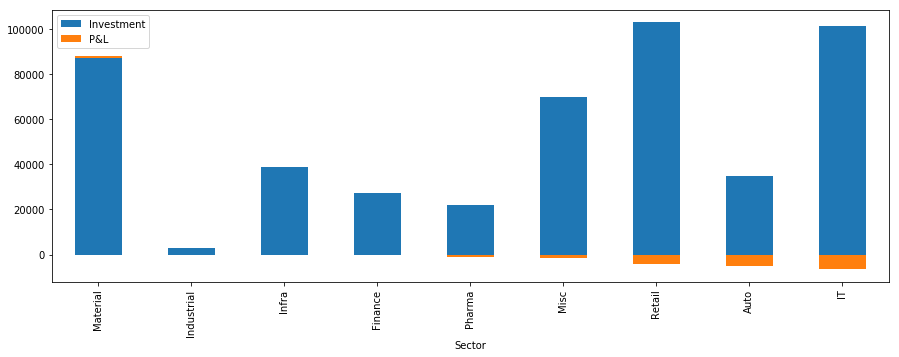

In [38]:
x = df.groupby([SECTOR]).sum()
x = x.sort_values([PROFIT_LOSS], ascending = False)
x = x[[INVESTMENT, PROFIT_LOSS]]
x.plot.bar(
    subplots = False, 
    stacked = True, 
    figsize = (15, 5)
)

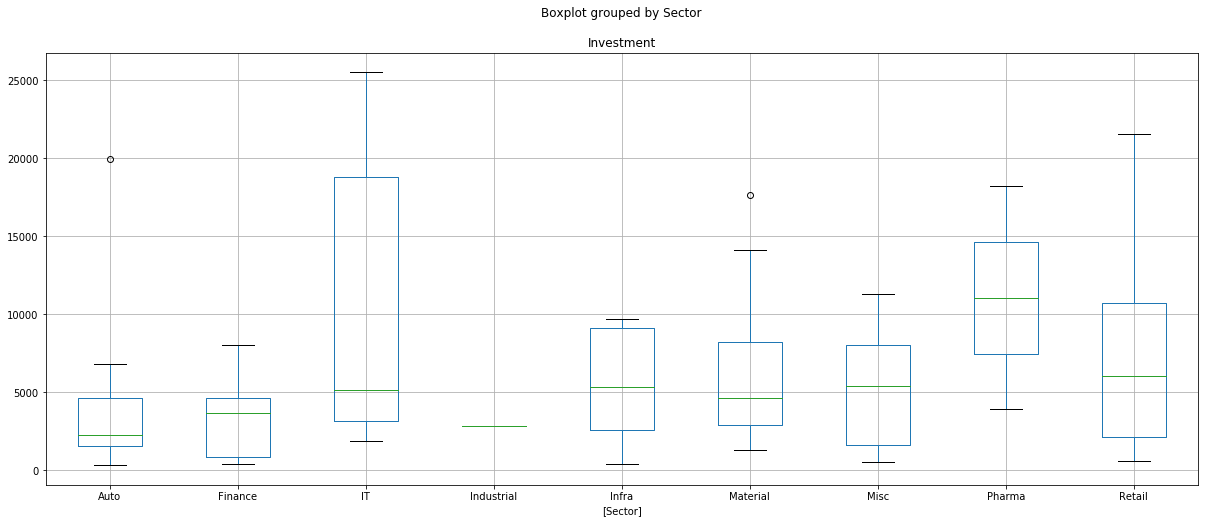

In [39]:
_, ax = plt.subplots(figsize=(20,8))
plt.suptitle('')
df.sort_values([INVESTMENT]).boxplot(column = [INVESTMENT], by = [SECTOR], ax = ax)

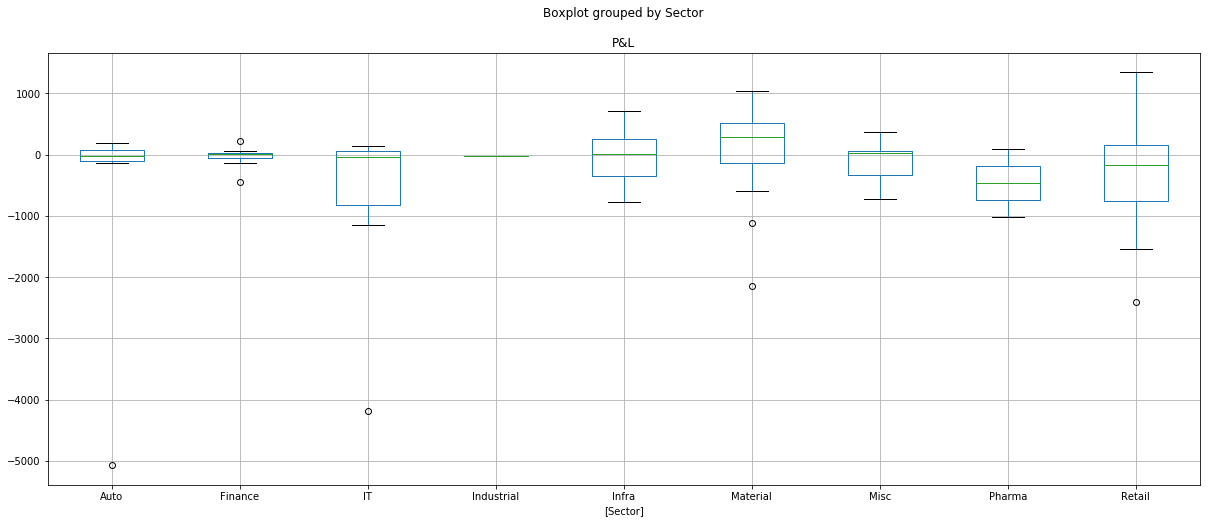

In [40]:
_, ax = plt.subplots(figsize=(20,8))
plt.suptitle('')
df.sort_values([PROFIT_LOSS]).boxplot(column = [PROFIT_LOSS], by = [SECTOR], ax = ax)

# Sub Sector Summary

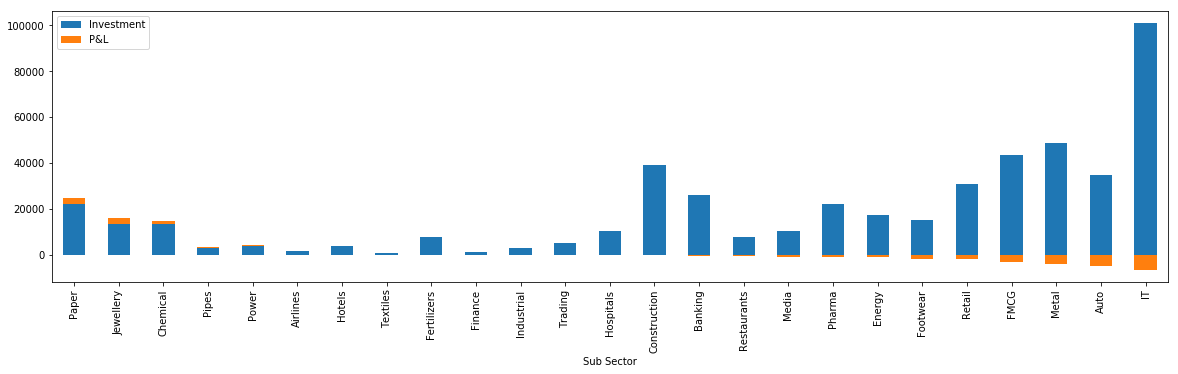

In [41]:
x = df.groupby([SUB_SECTOR]).sum()
x = x.sort_values([PROFIT_LOSS], ascending = False)
x = x[[INVESTMENT, PROFIT_LOSS]]
x.plot.bar(
    subplots = False, 
    stacked = True, 
    figsize = (20, 5)
)

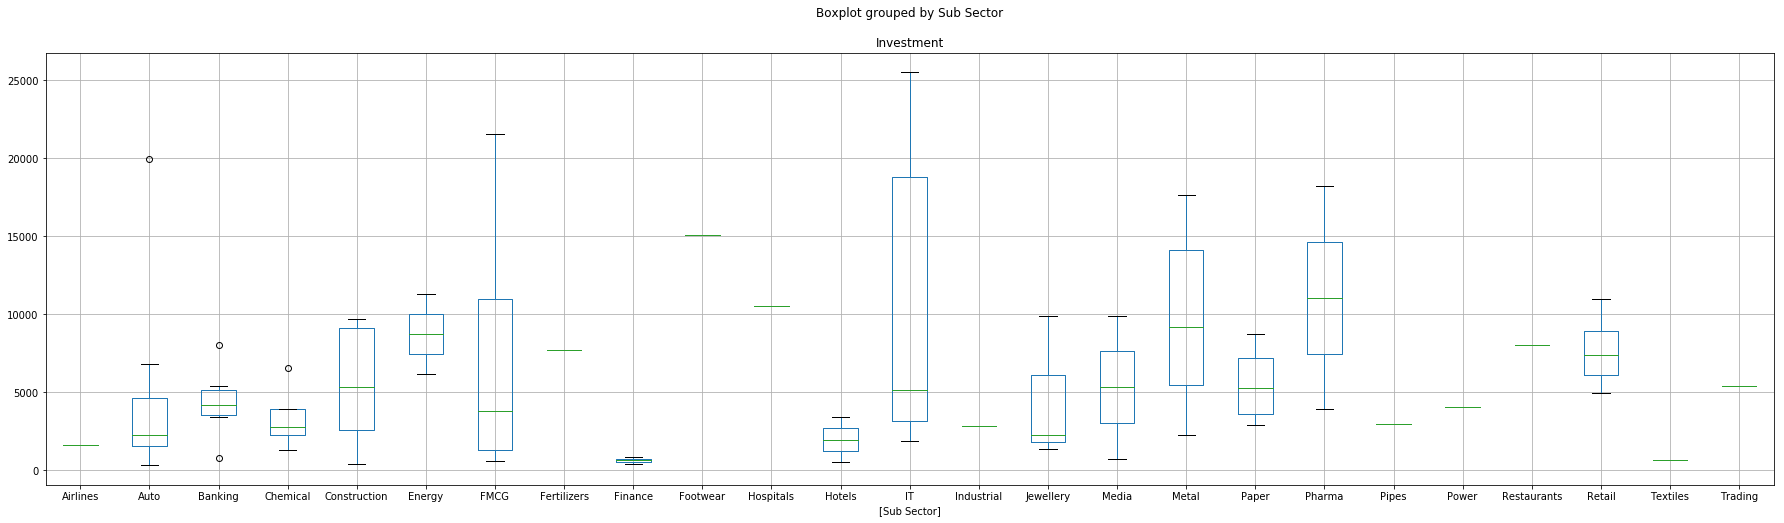

In [42]:
_, ax = plt.subplots(figsize=(30,8))
plt.suptitle('')
df.sort_values([INVESTMENT]).boxplot(column = [INVESTMENT], by = [SUB_SECTOR], ax = ax)

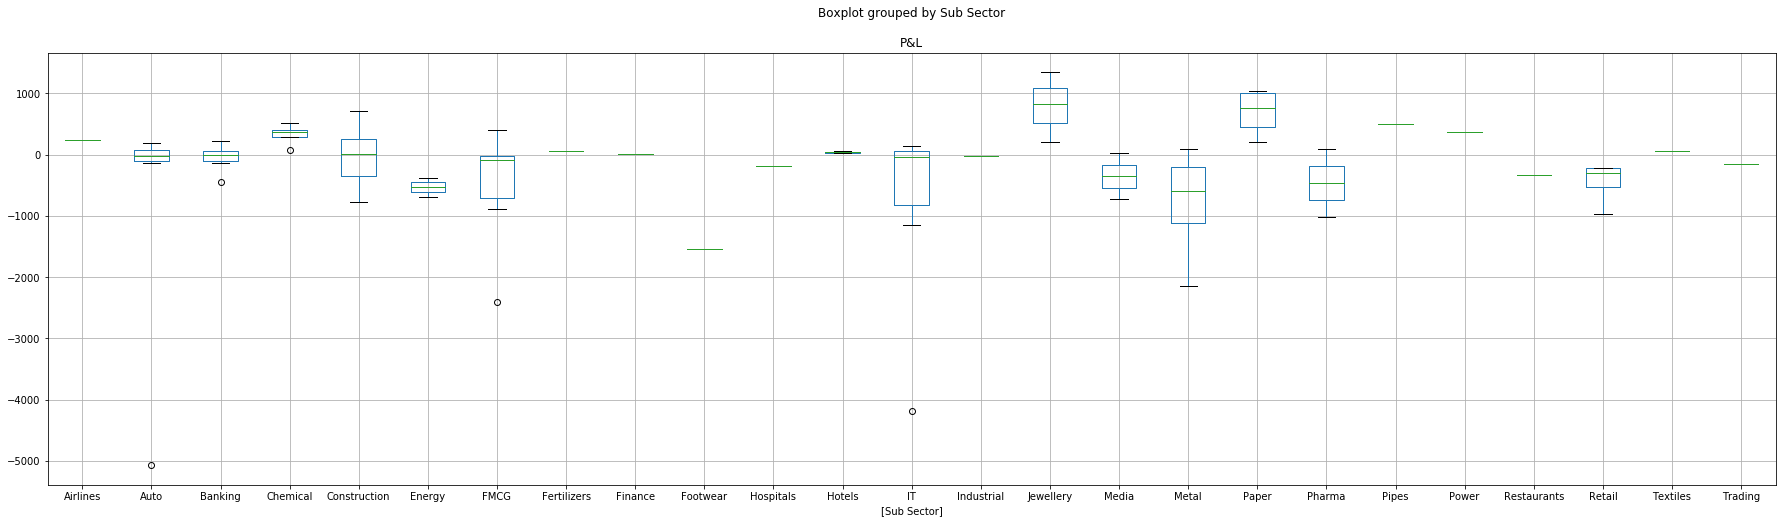

In [43]:
_, ax = plt.subplots(figsize=(30,8))
plt.suptitle('')
df.sort_values([PROFIT_LOSS]).boxplot(column = [PROFIT_LOSS], by = [SUB_SECTOR], ax = ax)

# Top Ten

In [44]:
def heatmap_top_ten(x, col, title):
    labels = np.asarray([
     "{0} \n {1:.1f}".format(symb, value)   
        for symb, value in zip(x.index.values, x[col])
    ]).reshape(2, 5)

    x = np.asarray(x[col]).reshape(2, 5)

    _, ax = plt.subplots(figsize = (15, 3))
    ax.axis('off')
    plt.title(title)
    
    sns.heatmap(x, annot = labels, fmt = "", ax = ax, linewidths = "0.5")

## Profit And Loss

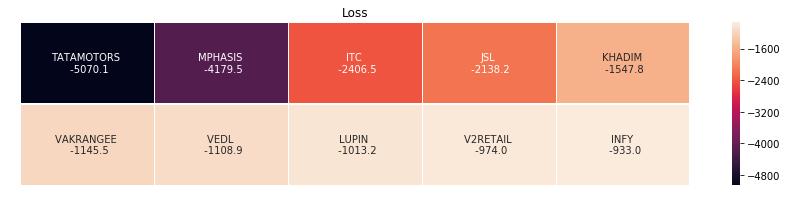

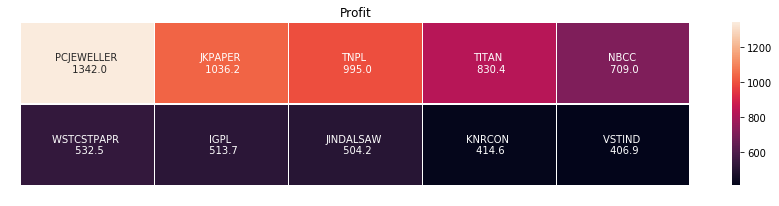

In [45]:
heatmap_top_ten(
    df.sort_values([PROFIT_LOSS]).head(10),
    PROFIT_LOSS,
    "Loss"
)

heatmap_top_ten(
    df.sort_values([PROFIT_LOSS]).tail(10).iloc[::-1],
    PROFIT_LOSS,
    "Profit"
)

## Day Change

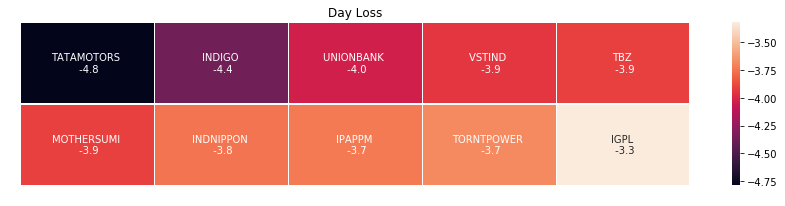

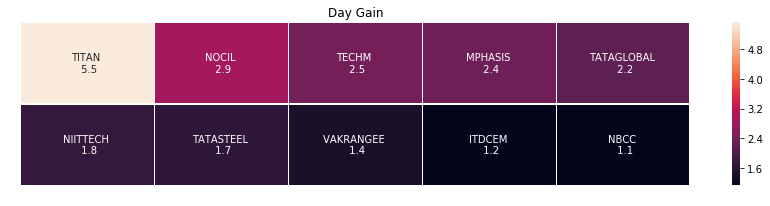

In [46]:
heatmap_top_ten(
    df.sort_values([DAY_CHANGE]).head(10),
    DAY_CHANGE,
    "Day Loss"
)
heatmap_top_ten(
    df.sort_values([DAY_CHANGE]).tail(10).iloc[::-1],
    DAY_CHANGE,
    "Day Gain"
)

In [47]:
df.loc["TECHM"]

Qty.                3
Avg. cost      707.67
LTP            724.55
Cur. val      2173.65
P&L             50.65
Net chg.         2.39
Day chg.         2.45
Sector             IT
Sub Sector         IT
Investment    2123.01
Name: TECHM, dtype: object

# Summary

In [236]:
d[[INVESTMENT, PROFIT_LOSS]].sum().to_frame().style.format("{:,.1f}")

,0
Investment,"1,163,582.4"
P&L,"-38,963.8"


In [29]:
df.loc[df[SECTOR] ==  'IT'].sort_values([PROFIT_LOSS])

,Qty.,Avg. cost,LTP,Cur. val,P&L,Net chg.,Day chg.,Sector,Sub Sector,Investment
Instrument,,,,,,,,,,
MPHASIS,18,1202.79,970.60,17470.80,-4179.50,-19.30,2.38,IT,IT,21650.22
PERSISTENT,22,716.65,550.40,12108.80,-3657.55,-23.20,-1.57,IT,IT,15766.30
FSL,204,65.04,57.15,11658.60,-1609.75,-12.13,-0.95,IT,IT,13268.16
VAKRANGEE,80,39.02,24.70,1976.00,-1145.50,-36.70,1.44,IT,IT,3121.60
INFY,37,689.42,664.20,24575.40,-933.00,-3.66,0.42,IT,IT,25508.54
...,...,...,...,...,...,...,...,...,...,...
TAKE,32,156.68,159.70,5110.40,96.50,1.92,6.50,IT,IT,5013.76
TCS,11,1902.14,1914.85,21063.35,139.85,0.67,0.26,IT,IT,20923.54
SONATSOFTW,10,315.25,338.10,3381.00,228.55,7.25,0.93,IT,IT,3152.50


In [103]:
# Print Stocks Sorted by LTP
#df.loc[df['Type'] ==  'IT'].sort_values('LTP', ascending = False)